# 빌트인 데이터 준비 기능 

* 참고자료: https://aws.amazon.com/ko/blogs/aws/next-generation-sagemaker-notebooks-now-with-built-in-data-preparation-real-time-collaboration-and-notebook-automation/
* dataset: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews?resource=download


## Install or Upgrade Packages

In [2]:
# Install Reinvent Wheels
! pip install --upgrade sagemaker
! pip install jupyterlab==3

## 데이터 s3 업로드

In [ ]:
! aws s3 cp 'Womens Clothing E-Commerce Reviews.csv' s3://'kaggle-dataset-innovate-demo'  

## 데이터 읽기


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

## 데이터 샘플링

In [5]:
sample_rate = 0.2

In [6]:
df = df.sample(frac=sample_rate)

## 데이터 탐색 (기존 방법)

* 데이터 확인

In [7]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4482,4482,1095,31,Unflattering shape,"Ref: 5'4"", 125# 27/4, 32g. i don't think this ...",2,0,5,General Petite,Dresses,Dresses
5539,5539,831,46,NaN,NaN,4,1,0,General Petite,Tops,Blouses
14759,14759,868,23,Lovely tunic,I love this tunic! with that said the reason i...,4,1,1,General,Tops,Knits
13661,13661,1078,43,Tricky to wear,I am torn about this dress. the print is very ...,3,1,2,General,Dresses,Dresses
9487,9487,829,53,"Awwww, so cute!","I could not resist this top. it is super cute,...",5,1,2,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
15026,15026,936,69,So soft,Love this jacket - got it in the charcoal colo...,5,1,1,General,Tops,Sweaters
1813,1813,481,53,Too shortwaisted,So cute and so adorable but too short for my b...,4,1,3,General Petite,Bottoms,Pants
16075,16075,936,43,Festive cardigan,This sweater is much more brilliant in person....,5,1,18,General Petite,Tops,Sweaters
206,206,862,43,NaN,Great shirt to wear with white pants and wedge...,5,1,1,General,Tops,Knits


* 히스토그램 

In [11]:
import numpy as np
import matplotlib.pyplot as plt # plotting

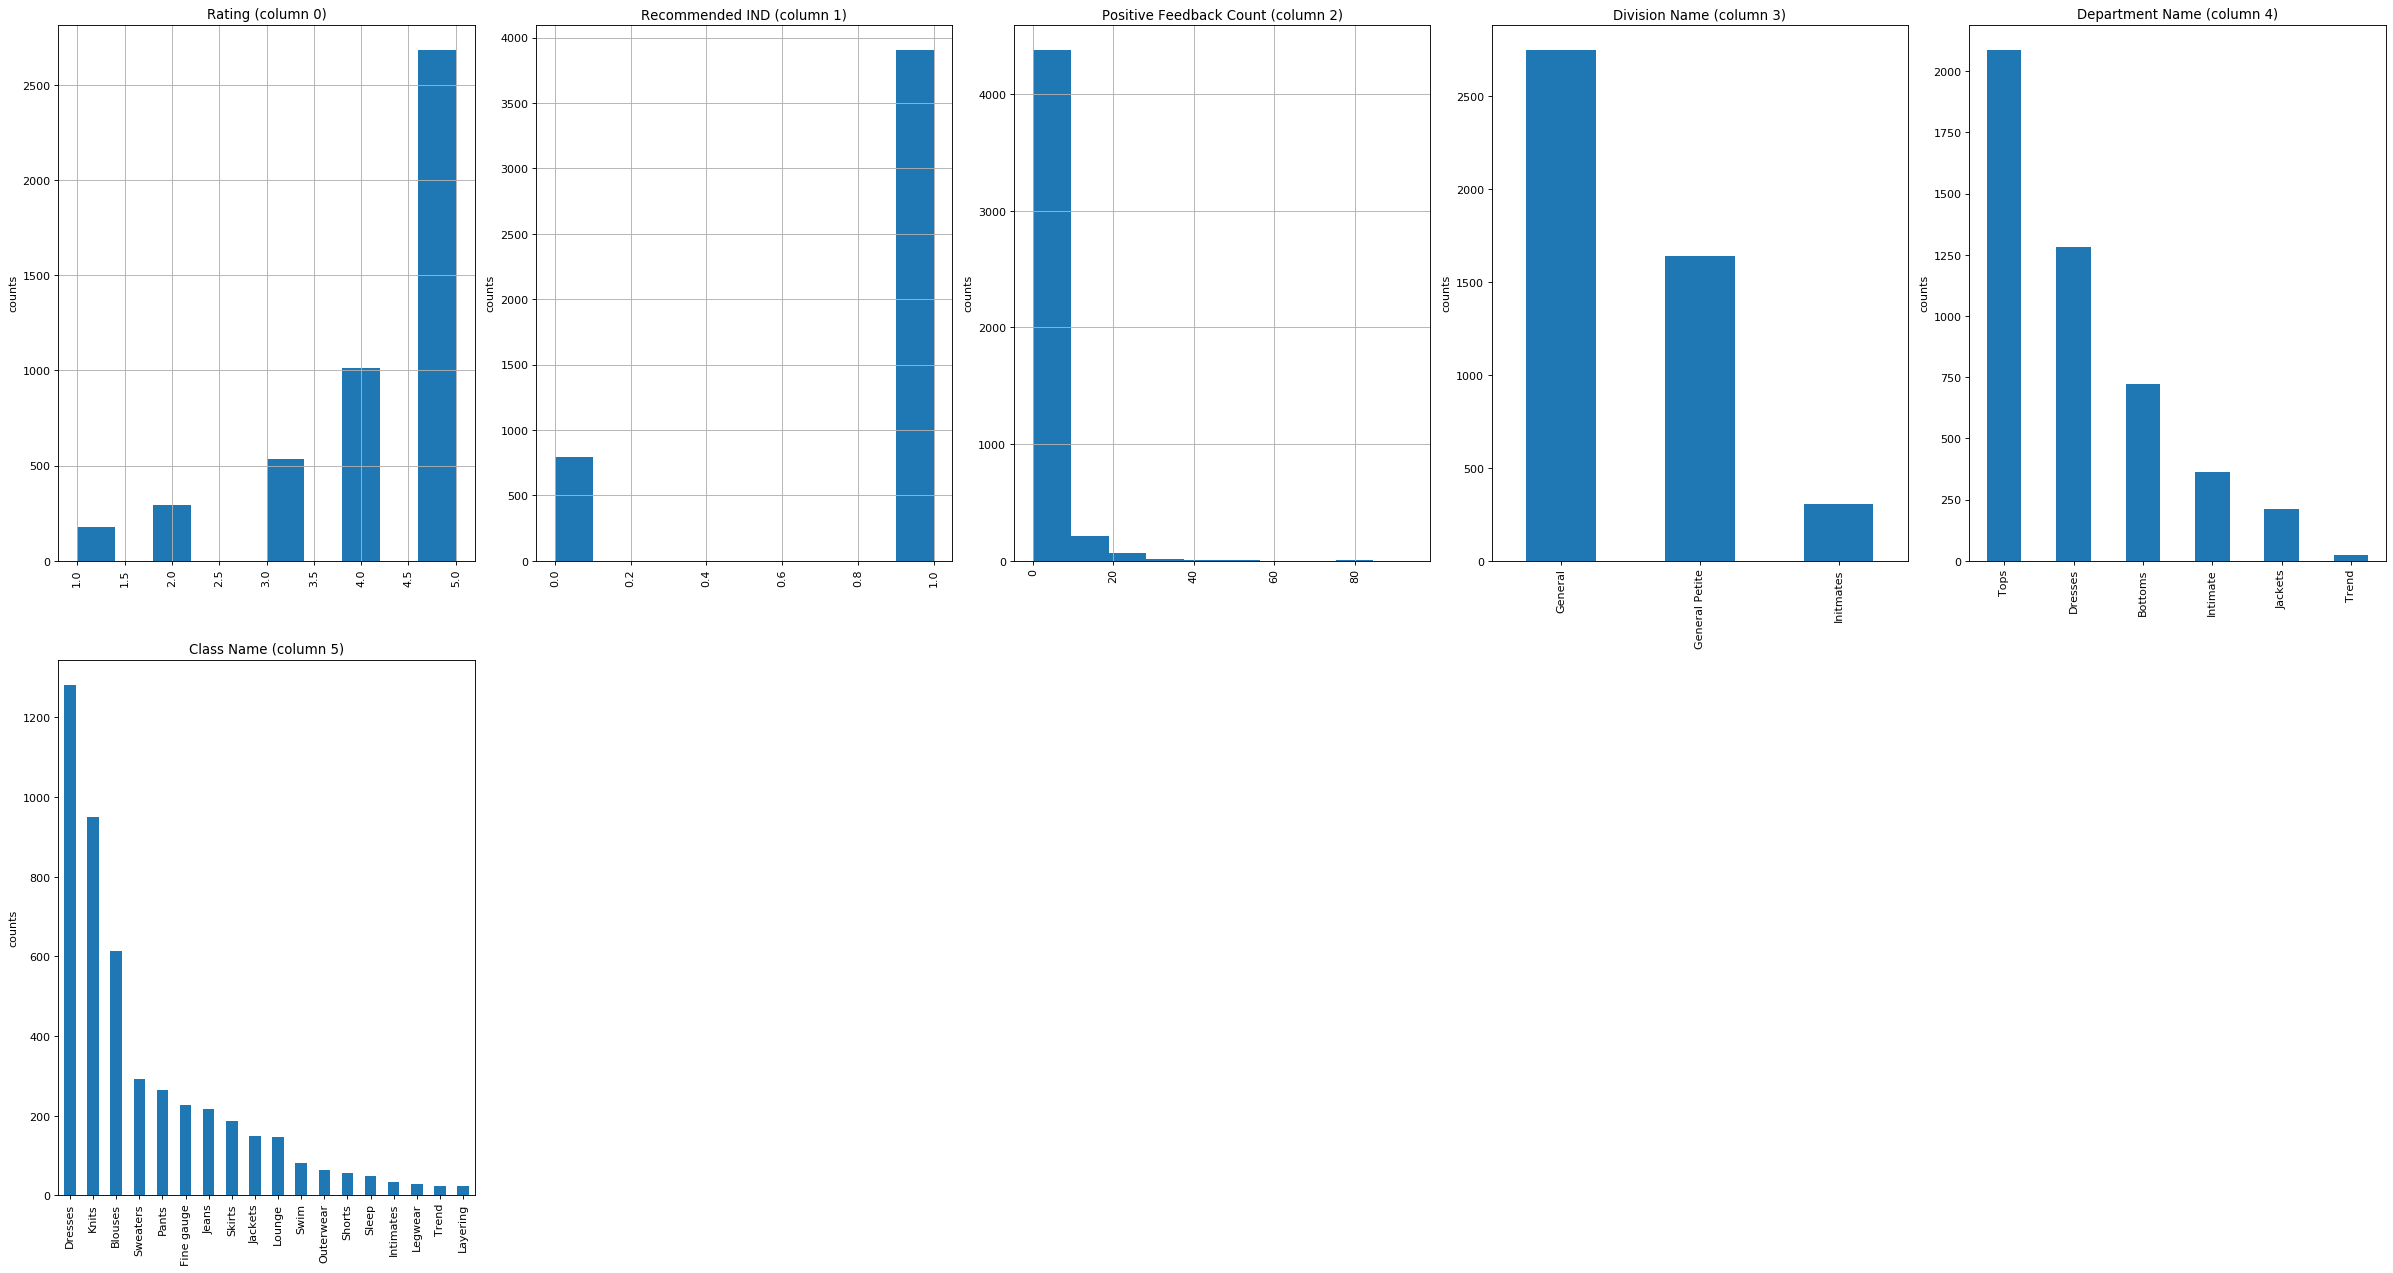

In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 10, 5)

* 데이터 전처리

In [14]:
df = df.drop(columns=['Unnamed: 0'])

In [15]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4482,1095,31,Unflattering shape,"Ref: 5'4"", 125# 27/4, 32g. i don't think this ...",2,0,5,General Petite,Dresses,Dresses
5539,831,46,NaN,NaN,4,1,0,General Petite,Tops,Blouses
14759,868,23,Lovely tunic,I love this tunic! with that said the reason i...,4,1,1,General,Tops,Knits
13661,1078,43,Tricky to wear,I am torn about this dress. the print is very ...,3,1,2,General,Dresses,Dresses
9487,829,53,"Awwww, so cute!","I could not resist this top. it is super cute,...",5,1,2,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
15026,936,69,So soft,Love this jacket - got it in the charcoal colo...,5,1,1,General,Tops,Sweaters
1813,481,53,Too shortwaisted,So cute and so adorable but too short for my b...,4,1,3,General Petite,Bottoms,Pants
16075,936,43,Festive cardigan,This sweater is much more brilliant in person....,5,1,18,General Petite,Tops,Sweaters
206,862,43,NaN,Great shirt to wear with white pants and wedge...,5,1,1,General,Tops,Knits


## 데이터 탐색 (빌트인 데이터 준비 기능 활용)

In [16]:
import sagemaker_datawrangler

In [17]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df = df.sample(frac=sample_rate)

* 데이터 확인

In [18]:
df

       Unnamed: 0  Clothing ID  Age                          Title  \
12281       12281         1081   51  Short dress, but great theory   
23167       23167         1094   27         Fun work/weekend dress   
771           771         1087   44                            NaN   
19616       19616          993   44        Lovely transition piece   
12200       12200          895   46                  Long cardigan   
...           ...          ...  ...                            ...   
13943       13943          420   57      Lovely, yet annoying.....   
20066       20066           49   27             Love this piece!!!   
18904       18904          674   42  Perfect for the beach or pool   
12700       12700          866   32                Beautiful top!!   
16860       16860          834   58                       Perfect!   

                                             Review Text  Rating  \
12281  I love this dress, but it is inches shorter th...       3   
23167  I bought this dr

In [71]:
# Pandas code generated by sagemaker_datawrangler
output_df = df.copy(deep=True)


# Code to Drop column for column: Unnamed: 0 to resolve warning: ID column 
output_df=output_df.drop(columns=['Unnamed: 0'])


# Code to Replace with new value for column: Title to resolve warning: Missing values 
generic_value = 'Other'
output_df['Title']=output_df['Title'].fillna(generic_value)



# Code to Drop missing for column: Review Text to resolve warning: Missing values 
output_df = output_df[output_df['Review Text'].notnull()]


# Code to Drop missing for column: Class Name to resolve warning: Missing values 
output_df = output_df[output_df['Class Name'].notnull()]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

y = np.ravel(processed_prior_data[["Churn"]])
x = processed_prior_data.drop(["Churn"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = RandomForestClassifier(n_estimators=int(number_rf_estimators), criterion="gini")
clf.fit(x_train, y_train)

In [73]:
output_df.shape

(4502, 10)